In [1]:
import numpy as np  #Importa libreria numerica 
import sympy as sym #simbolica
import matplotlib.pyplot as plt #importa matplotlib solo pyplot
import matplotlib.image as mpimg 
from sympy.plotting import plot  #para plotear 2 variables
from sympy.plotting import plot3d  # para 3
from sympy.plotting import plot3d_parametric_surface
from IPython.display import Image 
import ipympl  #Para importar gestor de imagenes 
sym.init_printing() #activa a jupyter para mostrar simbolicamente el output

%matplotlib inline

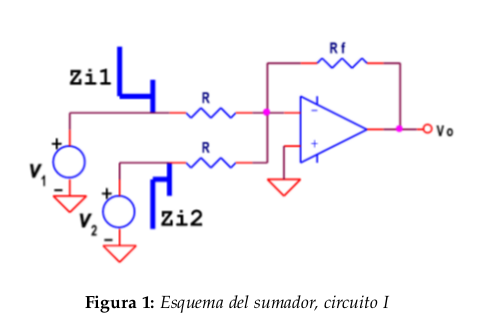

In [2]:
Image(filename='LAB2.png',width=300)
# Diseño tiene que cumplir
# Amplificador Operacional LM741 o LM324
# Alimentación Vcc = 10V, Vss = − 10V
# Ganancia en banda media A = Vo/V1 y A = Vo/V2 debe ser igual a 30 veces.
# Zi del amplificador no puede alterar o cargar la fuente de señal, es decir, Ri << Zi1 y Zi2. (al menos 10 veces)
# Usar Resistencias <= 1MΩ
# Las fuentes V1 y V2 (fig 2) deben considerarse en las condiciones 1.A y 1.B
# 1.A Ri = 50Ω
# 1.B Ri = 100KΩ

#Se usa LM741 que segun la tabla 6.7-1 del libro Dorf Svoboda 
#Ipol = 80nA ; Ios = 20nA
#Vos = 1mV ; Ad=200 V/mV = 200k V/V
#SR = 0.5 V/uS = 0.5 Meg V/S = 500k V/S
#CMRR = 31.6 V/mV = 31.6k V/V


In [3]:
#Forma generica
V1, V2 = sym.symbols('V_1, V_2')
Vo = sym.Function('V_o')(V1,V2)
eq_Vo = sym.Eq(Vo,(sym.diff(Vo.subs(V2,0),V1))*V1+sym.diff(Vo.subs(V1,0),V2)*V2)
sym.pprint(eq_Vo)

                 d                   d            
Vₒ(V₁, V₂) = V₁⋅───(Vₒ(V₁, 0)) + V₂⋅───(Vₒ(0, V₂))
                dV₁                 dV₂           


In [4]:
#CASO A) Ri=50
Ri, R, Rf = sym.symbols('Ri, R, Rf')
#Si hacemos el diseño como un OPAMP ideal
eq_Vo1 = sym.Eq(Vo.subs(V2,0),-V1*(Rf/R))
sym.pprint(eq_Vo1)
eq_Vo2 = sym.Eq(Vo.subs(V1,0),-V2*(Rf/R))
sym.pprint(eq_Vo2)
eq_Vo = sym.Eq(Vo, eq_Vo1.rhs + eq_Vo2.rhs)
sym.pprint(sym.simplify(eq_Vo))

#Si por diseño A=30 y Ri = 50 
eq_Ri_A = sym.Eq(Ri, 50)
sym.pprint(eq_Ri_A)

eq_R_A = sym.Eq(R , Ri*10 + Ri)
sym.pprint(eq_R_A)

eq_Rf_A = sym.Eq(Rf , 30 * (eq_R_A.rhs).subs(Ri,eq_Ri_A.rhs) )
sym.pprint(eq_Rf_A)

            -Rf⋅V₁ 
Vₒ(V₁, 0) = ───────
               R   
            -Rf⋅V₂ 
Vₒ(0, V₂) = ───────
               R   
             -Rf⋅(V₁ + V₂) 
Vₒ(V₁, V₂) = ──────────────
                   R       
Ri = 50
R = 11⋅Ri
Rf = 16500


In [5]:
#CASO B) Ri=100k
eq_Vo = sym.Eq(Vo, eq_Vo1.rhs + eq_Vo2.rhs)
sym.pprint(sym.simplify(eq_Vo))

#Si por diseño A=30 y Ri = 100k

eq_Ri_B = sym.Eq(Ri , 100e3)
sym.pprint(eq_Ri_B)

eq_R_B = sym.Eq(R , Ri*10 + Ri)
sym.pprint(eq_R_B)

eq_Rf_B = sym.Eq(Rf , 30 * (eq_R_B.rhs).subs(Ri,eq_Ri_B.rhs) )
sym.pprint(eq_Rf_B)

             -Rf⋅(V₁ + V₂) 
Vₒ(V₁, V₂) = ──────────────
                   R       
Ri = 100000.0
R = 11⋅Ri
Rf = 33000000.0


In [6]:
#En el ultimo caso Rf es de orden de los Megas
sym.pprint("{:.2e}".format(eq_Rf_B.rhs))

3.30e+7


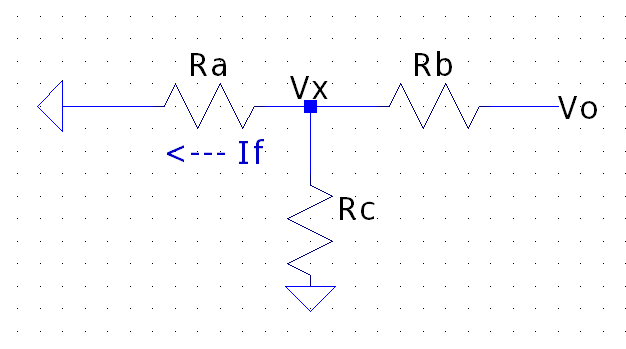

In [7]:
#Entonces se utiliza una red T
# Rf = Vo/If cuando Vi=0 
Image(filename='redT.png',width=300)

In [8]:
Ra, Rb, Rc = sym.symbols('Ra, Rb, Rc')
If, Irc, Vx, VoRT = sym.symbols('I_f, I_Rc, V_x, V_oRT')
eq_Vx =sym.Eq(Vx, If * Ra)
sym.pprint(eq_Vx)

eq_Irc =sym.Eq(Irc,eq_Vx.rhs/Rc)
sym.pprint(eq_Irc)

eq_VoRT=sym.Eq(VoRT, Vx + (If+Irc)*Rb)
sym.pprint(eq_VoRT)
#Remplazando
eq_VoRT=sym.Eq(VoRT, eq_Vx.rhs + (If+eq_Irc.rhs)*Rb)
sym.pprint(sym.apart(eq_VoRT,If))

eq_Rf_T=sym.Eq(Rf,eq_VoRT.rhs/If)
sym.pprint(sym.simplify(eq_Rf_T))

eq_Rc=sym.Eq(Rc , sym.solve(eq_Rf_T ,Rc)[0] ) 

sym.pprint(eq_Rc)

eq_Rc_val=sym.Eq(Rc,eq_Rc.rhs.subs({Ra:100e3,Rb:100e3,Rf:eq_Rf_B.rhs}))
sym.pprint(eq_Rc_val)


Vₓ = I_f⋅Ra
       I_f⋅Ra
I_Rc = ──────
         Rc  
V_oRT = Rb⋅(I_Rc + I_f) + Vₓ
        I_f⋅(Ra⋅Rb + Ra⋅Rc + Rb⋅Rc)
V_oRT = ───────────────────────────
                     Rc            
     Ra⋅Rb          
Rf = ───── + Ra + Rb
       Rc           
       -Ra⋅Rb    
Rc = ────────────
     Ra + Rb - Rf
Rc = 304.878048780488


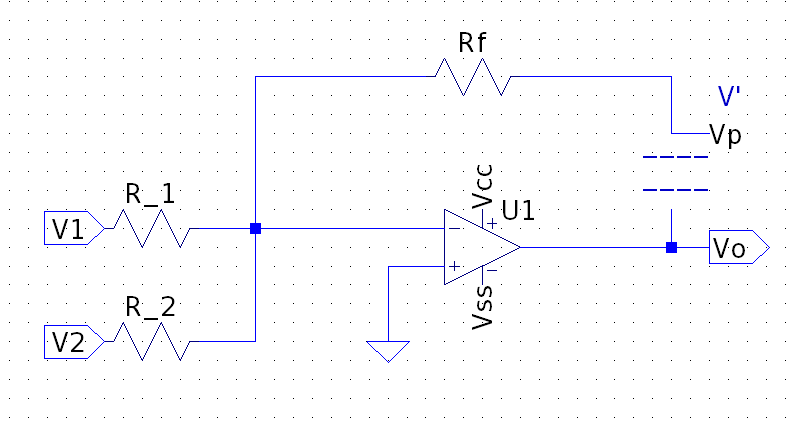

In [9]:
#BLACKMAN
#Primero analizamos el resultado con Ad=200k V/V
#entonces se utiliza la formula de BLACKMAN Avf= Ad/(1-T) 
#Para el caso A)
Image(filename='black1.png',width=300)

In [10]:
#Para el caso A)
Avf, Av, T = sym.symbols('A_vf, A_v, T')
eq_Avf=sym.Eq(Avf,Av/(1-T))
sym.pprint(eq_Avf)

V1, V2, Vp = sym.symbols('V_1,V_2,V_p')
Vo=sym.Function('V_o')(V1,V2,Vp)

eq_Av=sym.Eq(Av,sym.diff(Vo.subs({V2:0,Vp:0})))
sym.pprint(eq_Av)

eq_Av=sym.Eq(Av,sym.diff(Vo.subs({V1:0,Vp:0})))
sym.pprint(eq_Av)

eq_T=sym.Eq(T,sym.diff(Vo.subs({V1:0,V2:0})))
sym.pprint(eq_T)


         Aᵥ 
A_vf = ─────
       1 - T
      d               
Aᵥ = ───(Vₒ(V₁, 0, 0))
     dV₁              
      d               
Aᵥ = ───(Vₒ(0, V₂, 0))
     dV₂              
     d               
T = ───(Vₒ(0, 0, Vₚ))
    dVₚ              


In [12]:
#Av= Vo/V- * V-/V1
#solo para el informe
Vo_o_Vneg, Vneg_o_V1 = sym.symbols('(V_{o}/V_{-}), (V_{-}/V_{1})')
eq_Av=sym.Eq(Av,Vo_o_Vneg*Vneg_o_V1)
display(eq_Av)

Ad=sym.Symbol('A_d')
eq_Av_A=sym.Eq(Av,-Ad*((R**-1+Rf**-1)**-1)/(R+(R**-1+Rf**-1)**-1))
sym.pprint(eq_Av_A)
sym.pprint(sym.simplify(eq_Av_A))

sym.pprint( eq_Av_A.subs( {R:eq_R_A.rhs , Ri:eq_Ri_A.rhs , Rf:eq_Rf_A.rhs , Ad:200e3}))

             -A_d         
Aᵥ = ─────────────────────
     ⎛      1   ⎞ ⎛1    1⎞
     ⎜R + ──────⎟⋅⎜── + ─⎟
     ⎜    1    1⎟ ⎝Rf   R⎠
     ⎜    ── + ─⎟         
     ⎝    Rf   R⎠         
     -A_d⋅Rf 
Aᵥ = ────────
     R + 2⋅Rf
Aᵥ = -98360.6557377049


In [13]:
eq_T_A=sym.Eq(T,-Ad*(R/2)/(R/2+Rf))
sym.pprint(sym.simplify(eq_T_A))

eq_T_A_val=eq_T_A.subs( {R:eq_R_A.rhs , Ri:eq_Ri_A.rhs , Rf:eq_Rf_A.rhs , Ad:200e3})
sym.pprint(eq_T_A_val)

    -A_d⋅R  
T = ────────
    R + 2⋅Rf
T = -3278.68852459016


In [14]:
eq_Avf_A=sym.Eq(Avf,eq_Av_A.rhs/(1-eq_T_A.rhs))
sym.pprint(sym.simplify(eq_Avf_A))
sym.pprint( eq_Avf_A.subs( {R:eq_R_A.rhs , Ri:eq_Ri_A.rhs , Rf:eq_Rf_A.rhs , Ad:200e3}))

           -A_d⋅Rf     
A_vf = ────────────────
       A_d⋅R + R + 2⋅Rf
A_vf = -29.9908527898991


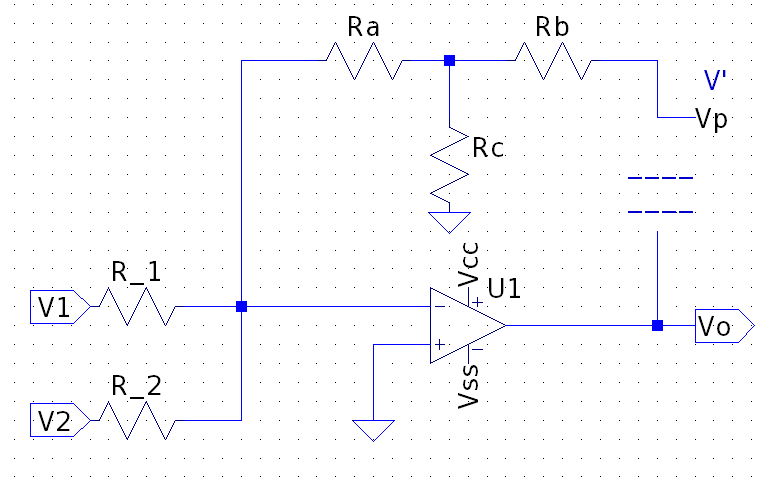

In [15]:
#BLACKMAN
#Primero analizamos el resultado con Ad=200k V/V
#entonces se utiliza la formula de BLACKMAN Avf= Ad/(1-T) 
#Para el caso B)
Image(filename='black2.png',width=300)

In [16]:
#Para el caso B)
Avf, Av, T = sym.symbols('A_vf, A_v, T')
eq_Avf=sym.Eq(Avf,Av/(1-T))
sym.pprint(eq_Avf)

         Aᵥ 
A_vf = ─────
       1 - T


In [17]:
#Av= Vo/V- * V-/V1
#solo para el informe
Vo_o_Vneg, Vneg_o_V1 = sym.symbols('(V_{o}/V_{-}), (V_{-}/V_{1})')
eq_Av=sym.Eq(Av,Vo_o_Vneg*Vneg_o_V1)
display(eq_Av)

eq_Av_B=sym.Eq(Av,-Ad*(R**-1+(Ra+(Rc**-1+Rb**-1)**-1)**-1)**-1/(R+(R**-1+(Ra+(Rc**-1+Rb**-1)**-1)**-1)**-1))
sym.pprint(sym.simplify(eq_Av_B))
sym.pprint(eq_Av_B.subs({R:eq_R_B.rhs , Ri:eq_Ri_B.rhs , Ra:100e3, Rb:100e3, Rc:eq_Rc_val.rhs , Ad:200e3}))

          -A_d⋅(Ra⋅(Rb + Rc) + Rb⋅Rc)      
Aᵥ = ──────────────────────────────────────
     R⋅(Rb + Rc) + 2⋅Ra⋅(Rb + Rc) + 2⋅Rb⋅Rc
Aᵥ = -15424.1645244216


In [18]:
#T= Vo/Vp = Vo/V- V-/Ia Ia/Ib Ib/Vp
#Solo para informe
Vo_o_Vneg, Vneg_o_Ia, Ia_o_Ib, Ib_o_Vp = sym.symbols('(V_{o}/V_{-}), (V_{-}/I_{a}), (I_{a}/I_{b}). (I_{b}/V_{p})')
eq_T=sym.Eq(T,Vo_o_Vneg*Vneg_o_Ia*Ia_o_Ib*Ib_o_Vp)
display(eq_T)

eq_T_B=sym.Eq(T,-Ad*(R/2)*(Rc/((R/2)+Ra+Rc))*(1/(Rb+((Rc**-1+((R/2)+Ra)**-1)**-1))))
sym.pprint(sym.simplify(eq_T_B))
eq_T_B_val=eq_T_B.subs({R:eq_R_B.rhs , Ri:eq_Ri_B.rhs , Ra:100e3, Rb:100e3, Rc:eq_Rc_val.rhs , Ad:200e3})
sym.pprint(eq_T_B_val)

                 -A_d⋅R⋅Rc              
T = ────────────────────────────────────
    Rb⋅(R + 2⋅Ra + 2⋅Rc) + Rc⋅(R + 2⋅Ra)
T = -514.13881748072


In [19]:
eq_Avf_B=sym.Eq(Avf,eq_Av_B.rhs/(1-eq_T_B.rhs))
sym.pprint(sym.simplify(eq_Avf_B))
sym.pprint(eq_Avf_B.subs({R:eq_R_B.rhs , Ri:eq_Ri_B.rhs , Ra:100e3, Rb:100e3, Rc:eq_Rc_val.rhs , Ad:200e3}))

                  -A_d⋅(Ra⋅Rb + Ra⋅Rc + Rb⋅Rc)             
A_vf = ────────────────────────────────────────────────────
       A_d⋅R⋅Rc + R⋅Rb + R⋅Rc + 2⋅Ra⋅Rb + 2⋅Ra⋅Rc + 2⋅Rb⋅Rc
A_vf = -29.941763270439


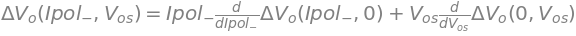

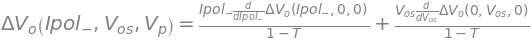

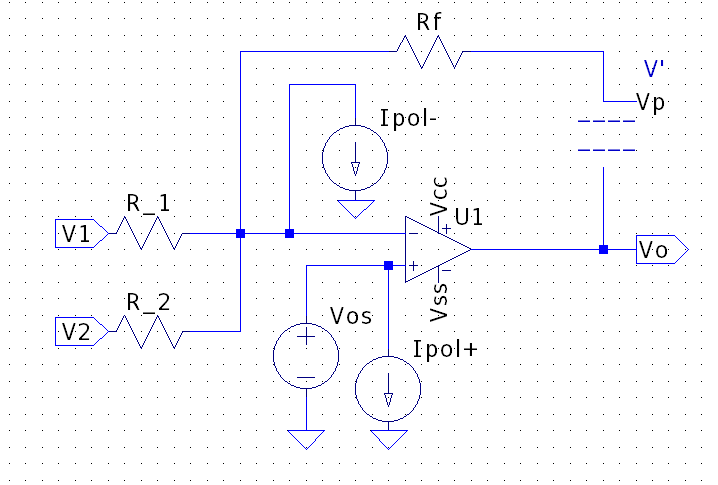

In [20]:
#ERROR POR Vos y Ipol-, como en (+) no hay resistencia, Vo(Ipol+)= 0 => esto genera que el error sea mayor
Ipol, Vos = sym.symbols("Ipol_-, V_os")
DVo=sym.Function('\Delta V_o')(Ipol,Vos)
eq_Dvo=sym.Eq(DVo,sym.diff(DVo.subs(Vos,0))*Ipol+sym.diff(DVo.subs(Ipol,0))*Vos)
display(eq_Dvo)

#Si se aplica blackman 
DVo=sym.Function('\Delta V_o')(Ipol,Vos,Vp)
eq_Dvo=sym.Eq(DVo,(sym.diff(DVo.subs({Vos:0,Vp:0}))/(1-T))*Ipol+(sym.diff(DVo.subs({Ipol:0,Vp:0}))/(1-T)*Vos))
display(eq_Dvo)
Image(filename='black3.png',width=300)

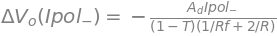

\Delta Vₒ(8.0e-8) = -0.00131959752275556
\Delta Vₒ(0.001) = 0.0609814006727948
\Delta Vₒ(Ipol₋, Vₒₛ) = 0.0623009981955504


In [21]:
#CASO A)
DVo=sym.Function('\Delta V_o')(Ipol)
eq_DVo_Ipol=sym.Eq(DVo,Ipol*(((R/2)**-1+Rf**-1)**-1)*-Ad/(1-T))
display(eq_DVo_Ipol)
eq_DVo_Ipol_val=(eq_DVo_Ipol.subs({T:eq_T_A_val.rhs, Ad:200e3,Ipol:80e-9,Rf:eq_Rf_A.rhs,R:eq_R_A.rhs , Ri:eq_Ri_A.rhs}))
sym.pprint(eq_DVo_Ipol_val)

DVo=sym.Function('\Delta V_o')(Vos)
eq_DVo_Vos=sym.Eq(DVo,Vos*(Ad/(1-T)))
eq_DVo_Vos_val=(eq_DVo_Vos.subs({T:eq_T_A_val.rhs, Ad:200e3,Vos:1e-3,Rf:eq_Rf_A.rhs,R:eq_R_A.rhs , Ri:eq_Ri_A.rhs}))
sym.pprint(eq_DVo_Vos_val)

DVo=sym.Function('\Delta V_o')(Ipol,Vos)
eq_DVo_Val=sym.Eq(DVo,abs(eq_DVo_Ipol_val.rhs)+abs(eq_DVo_Vos_val.rhs))
sym.pprint(eq_DVo_Val)


In [22]:
#Error por CMRR no infinito y Ad no infinito
#Como la entrada + esta a tierra entonces el error por CMRR es despreciable
DVo=sym.Symbol('\Delta V_o')
FS, CMRR = sym.symbols('FS, CMRR')
eq_DVo_fin = sym.Eq(DVo,FS/abs(T)+FS/CMRR)
sym.pprint(eq_DVo_fin)
eq_DVo_fin = sym.Eq(DVo,FS/abs(T))
sym.pprint(eq_DVo_fin)
eq_DVo_fin_Val=eq_DVo_fin.subs({CMRR:31.6e3,FS:10,T:eq_T_A_val.rhs})
sym.pprint(eq_DVo_fin_Val)

             FS    FS 
\Delta Vₒ = ─── + ────
            │T│   CMRR
             FS
\Delta Vₒ = ───
            │T│
\Delta Vₒ = 0.00305


In [23]:
#Sumando todos los errores
eq_DVo_T=sym.Eq(DVo,eq_DVo_Val.rhs + eq_DVo_fin_Val.rhs)
sym.pprint(eq_DVo_T)

\Delta Vₒ = 0.0653509981955503


In [24]:
#ERROR AC: Ancho de banda PLENA POTENCIA 
t,Vpap,W,WHP,fHP=sym.symbols('t, V_pap, omega, omega_HP, f_HP')
SR = sym.Function('SR')()
Vo = sym.Function('V_o')(t)
eq_SR=sym.Eq(SR,sym.diff(Vo))
sym.pprint(eq_SR)

eq_Vo_t=sym.Eq(Vo,Vpap*sym.sin(W*t))
sym.pprint(eq_Vo_t)
eq_SR=sym.Eq(SR,sym.diff(eq_Vo_t.rhs,t).subs(t,0))
sym.pprint(eq_SR)
eq_WHP=sym.Eq(WHP,sym.solve(eq_SR,W)[0])
sym.pprint(eq_WHP)
eq_WHP_Val=eq_WHP.subs({SR:500e3, Vpap:10})
sym.pprint(eq_WHP_Val)
eq_fHP_Val=sym.Eq(fHP,eq_WHP_Val.rhs/(2*np.pi))
sym.pprint(eq_fHP_Val)

       d        
SR() = ──(Vₒ(t))
       dt       
Vₒ(t) = Vₚₐₚ⋅sin(ω⋅t)
SR() = Vₚₐₚ⋅ω
       SR()
ω_HP = ────
       Vₚₐₚ
ω_HP = 50000.0
f_HP = 7957.74715459477


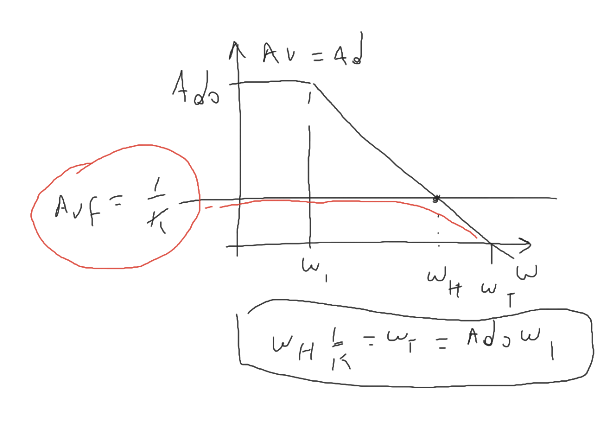

In [26]:
#ERROR AC amcho de banda de peq señal
GBW=1e6
Wh=GBW/Avf
WH1=2*np.pi*GBW/30
display(WH1)
Image(filename='WH.png',width=300)


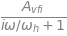

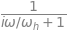

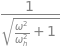

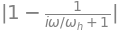

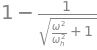

In [29]:
# Errores AC ERROR VECTORIAL NORMALIZADO
#Función de transferencia de la ganancia
W, Wh, Avfi = sym.symbols('omega, omega_h, A_vfi')

Avf=Avfi/(1+sym.I*W/Wh)
display(Avf)
avf=1/(1+sym.I*W/Wh)
display(avf)
avf_mod=1/sym.sqrt(1+(W/Wh)**2)
display(avf_mod)
avf_arg=-sym.atan(W/Wh)
display(avf_arg)
Ev=abs(1-avf)
display(Ev)
Ev_mod=1-1/sym.sqrt(1+(W/Wh)**2)
display(Ev_mod)
Ev_arg=(sym.pi/2) - sym.atan(W/Wh)
display(Ev_arg)